In [ ]:
We will start our discussion with little introduction about SVM. 
Support Vector Machine(SVM) is a supervised binary classification algorithm.
Given a set of points of two types in N-dimensional place SVM generates a (N−1)
dimensional hyperplane to separate those points into two groups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
cancer=datasets.load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.feature_names.shape

(30,)

In [8]:
x=cancer.data
y=cancer.target

In [9]:
x.shape, y.shape

((569, 30), (569,))

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# standarization

In [11]:
scaler= StandardScaler()

In [12]:
x_scaled=scaler.fit_transform(x)

In [13]:
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# split the data and build the model

In [14]:
x_train ,x_test, y_train , y_test = train_test_split(x_scaled ,y, test_size=0.2, random_state=42,stratify=y)

accuracy 0.9736842105263158
pricision 0.9859154929577465
recall 0.9722222222222222
confusion  matrix


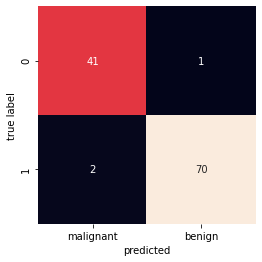

In [15]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_predict= clf.predict(x_test)
print("accuracy", metrics.accuracy_score(y_test, y_predict))
print("pricision", metrics.precision_score(y_test, y_predict))
print("recall", metrics.recall_score(y_test, y_predict))


print('confusion  matrix')
mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat, square=True, annot=True , fmt='d', cbar=False , xticklabels=cancer.target_names)

plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()

In [16]:
element , count = np.unique(y_test, return_counts=True)

In [17]:
element , count

(array([0, 1]), array([42, 72], dtype=int64))

In [ ]:
#without scaling future

In [18]:
x_train ,x_test, y_train , y_test = train_test_split(x ,y, test_size=0.2, random_state=42,stratify=y)

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_predict= clf.predict(x_test)
print("accuracy", metrics.accuracy_score(y_test, y_predict))

accuracy 0.956140350877193


# Polynomial kernal

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly', degree=2 , gamma=100)
clf.fit(x_train,y_train)
y_predict= clf.predict(x_test)
print("accuracy", metrics.accuracy_score(y_test, y_predict))

print("pricision", metrics.precision_score(y_test, y_predict))

print("recall", metrics.recall_score(y_test, y_predict))


print('confusion  matrix')

mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat, square=True, annot=True , fmt='d', cbar=False , xticklabels=cancer.target_names)

plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()

# sigmoid kernal

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid', degree=2 , gamma=100)
clf.fit(x_train,y_train)
y_predict= clf.predict(x_test)
print("accuracy", metrics.accuracy_score(y_test, y_predict))

print("pricision", metrics.precision_score(y_test, y_predict))

print("recall", metrics.recall_score(y_test, y_predict))


print('confusion  matrix')

mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat, square=True, annot=True , fmt='d', cbar=False , xticklabels=cancer.target_names)

plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()